Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Collecting the CSV File

In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\Glass Identification.csv",header = None)

Exploratory Data Analysis

In [3]:
# Adding the column names to the dataset
df.columns = ['Id Number','RI:refractive index','Na:Sodium','Mg:Magnesium','Al:Aluminium','Si:Silicon','K:Potassium','Ca:Calcium','Ba:Barium','Fe:Iron','Glass(type)']

In [4]:
df.head()

,Id Number,RI:refractive index,Na:Sodium,Mg:Magnesium,Al:Aluminium,Si:Silicon,K:Potassium,Ca:Calcium,Ba:Barium,Fe:Iron,Glass(type)
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df['Glass(type)'].value_counts()

Glass(type)
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [6]:
df.shape

(214, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id Number            214 non-null    int64  
 1   RI:refractive index  214 non-null    float64
 2   Na:Sodium            214 non-null    float64
 3   Mg:Magnesium         214 non-null    float64
 4   Al:Aluminium         214 non-null    float64
 5   Si:Silicon           214 non-null    float64
 6   K:Potassium          214 non-null    float64
 7   Ca:Calcium           214 non-null    float64
 8   Ba:Barium            214 non-null    float64
 9   Fe:Iron              214 non-null    float64
 10  Glass(type)          214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


Our dataset does not contain any null values. We will have to change the data type of Glass(type) feature from int to categorical so that we can use a classification algo. to predict the glass type properly.

In [8]:
df.describe()

,Id Number,RI:refractive index,Na:Sodium,Mg:Magnesium,Al:Aluminium,Si:Silicon,K:Potassium,Ca:Calcium,Ba:Barium,Fe:Iron,Glass(type)
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Exploratory Data Analysis (Graphical Analysis)

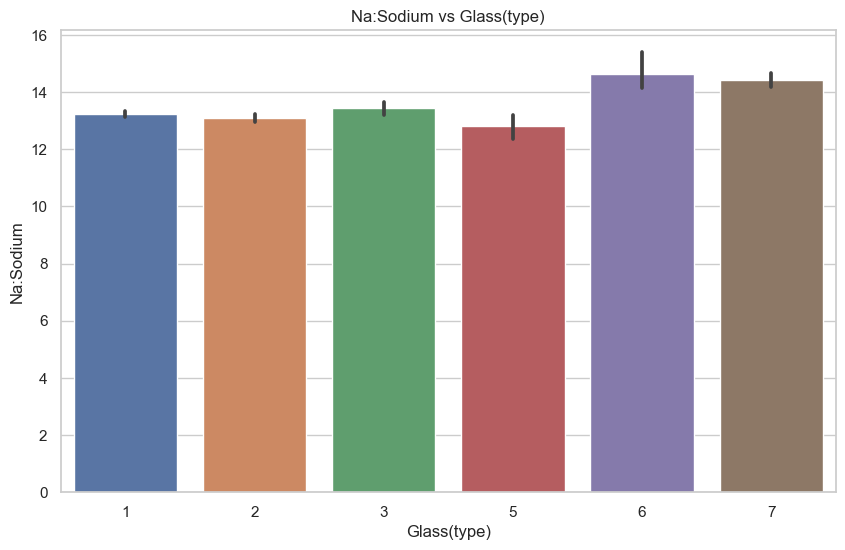

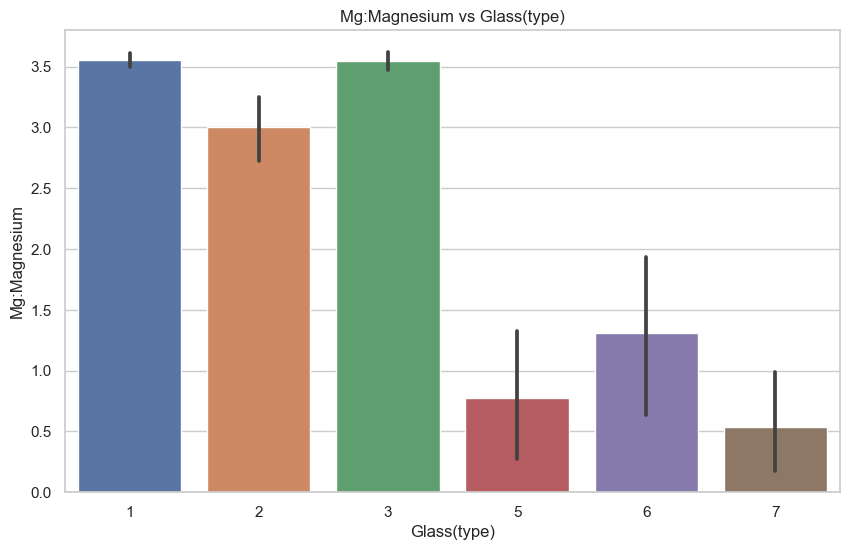

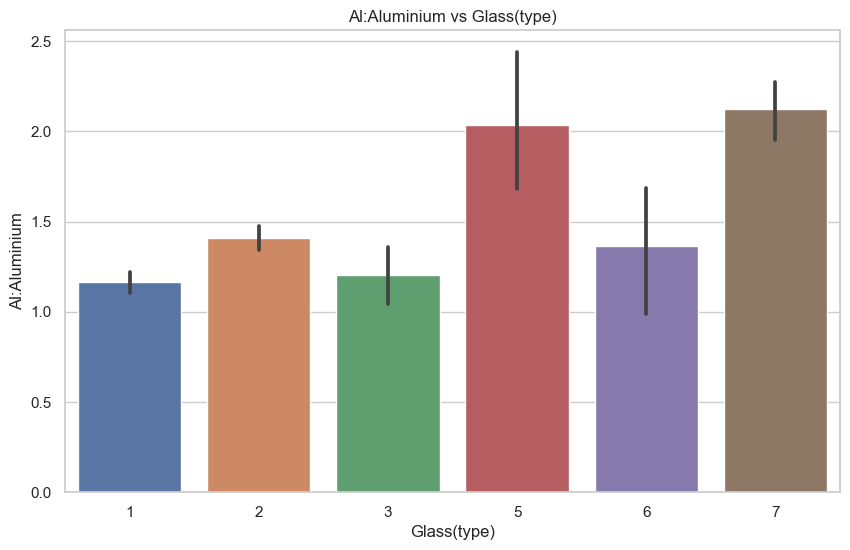

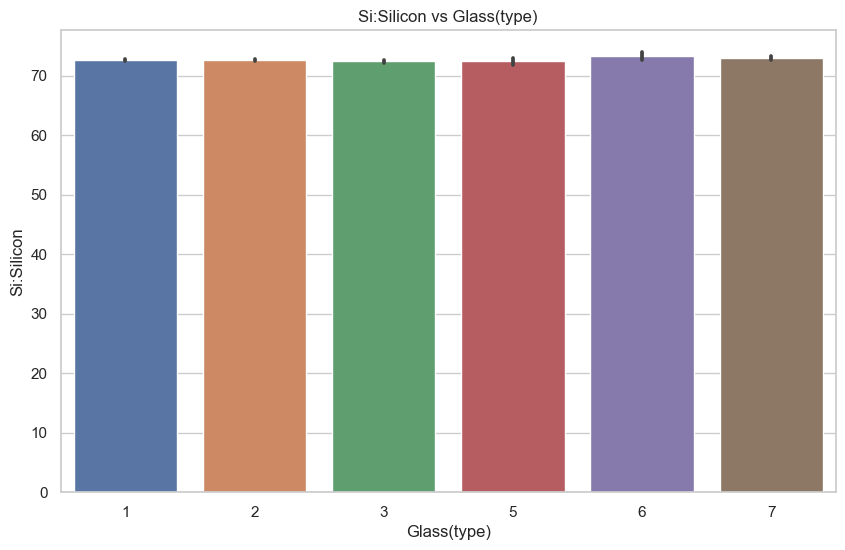

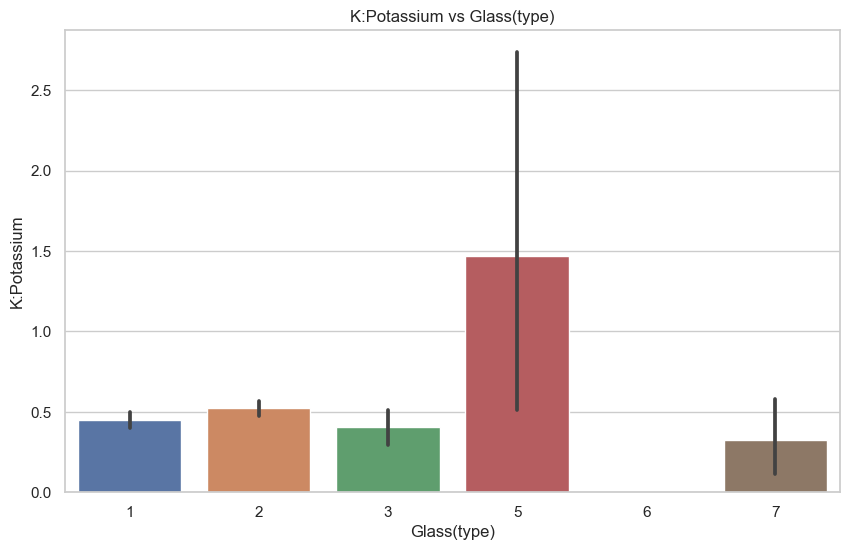

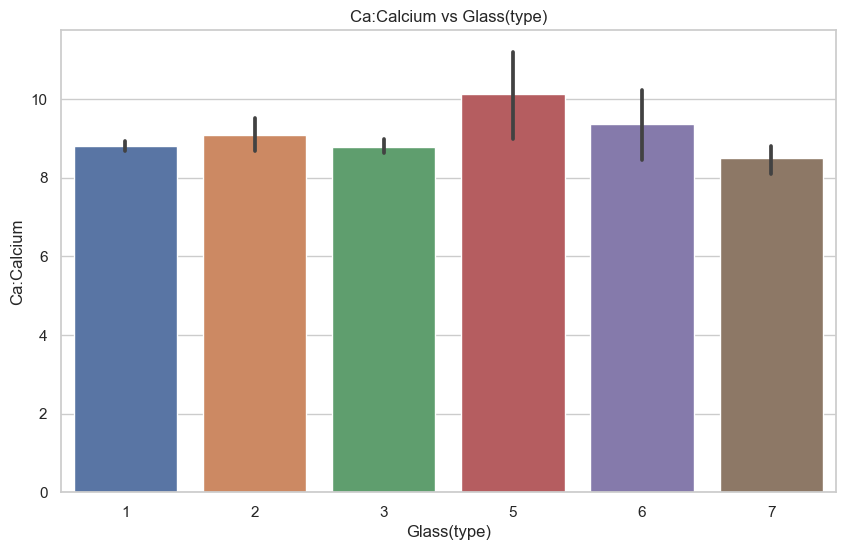

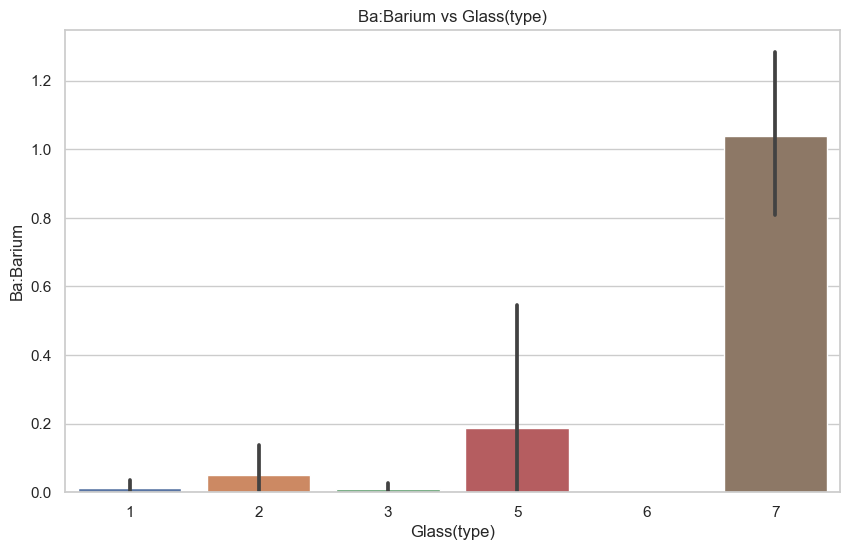

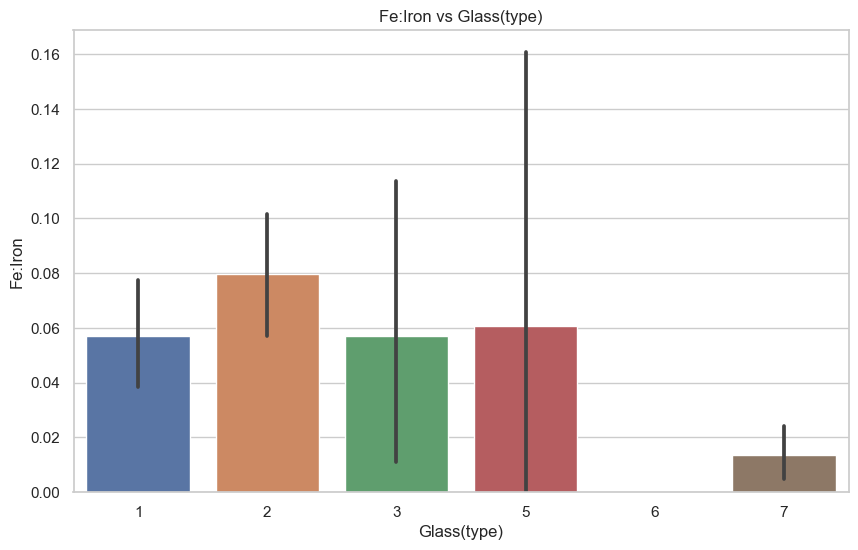

In [9]:
col_exclude = [0,1,10]
col_compare = [col for col in df.columns if col not in df.columns[col_exclude]]
sns.set(style='whitegrid')
for col in col_compare:
    plt.figure(figsize=(10,6))
    sns.barplot(data = df, x = 'Glass(type)', y = col)
    plt.title(f"{col} vs Glass(type)")
    plt.xlabel("Glass(type)")
    plt.ylabel(col)
    plt.show()

Plotting the Glass(type) with all the other features

Float Glass finds its way through various secondary processing, such as; heat treatment, Lamination and institution to Door, Window and Glazing Applications both for the building and automotive industry, the value added online coated glass with metal oxide coatings are primarily used for commercial and residential purposes.

Molten glass, at approximately 1000°C, is poured continuously from a furnace onto a shallow bath of molten tin. It floats on the tin, spreads out and forms a level surface. Thickness is controlled by the speed at which solidifying glass ribbon is drawn off from the bath.

Examining a better understanding of glass type:- 
1. building_windows_float_processed - has a higher quantity of magnesium, silicon and calcium
2. building_windows_non_float_processed - has a higher quantity of sodium, aluminium,silicon, calcium and iron 
3. vehicle_windows_float_processed - has a higher quantity of sodim, magnesium and silicon
4. vehicle_windows_non_float_processed - we do not have any data for this in the dataset
5. containers - has a higher quantity of sodium, silicon, magnesium and calcium 
6. tableware - has the highest quantity of sodium followed by silicon 
7. headlamps - the only material with high quantity of barium, followed by sodium, alimunium, silicon 

Type of glass:- 
1. building_windows_float_processed
2. building_windows_non_float_processed
3. vehicle_windows_float_processed
4. vehicle_windows_non_float_processed
5. containers
6. tableware
7. headlamps

Checking for Skewness in the features

The statistical distribution showed that there can be some skewness in the features

In [10]:
col_exclude = 'Id Number'
col_include = [col for col in df.columns if col != col_exclude]
for col_name in col_include:
    skewness = df[col_name].skew()
    print(f"Skewness of {col_name}: {skewness}")

Skewness of RI:refractive index: 1.6254305060087644
Skewness of Na:Sodium: 0.4541814536577495
Skewness of Mg:Magnesium: -1.1525593175802356
Skewness of Al:Aluminium: 0.9072898090246346
Skewness of Si:Silicon: -0.7304472251318588
Skewness of K:Potassium: 6.55164830960496
Skewness of Ca:Calcium: 2.0470539131183103
Skewness of Ba:Barium: 3.4164245693025577
Skewness of Fe:Iron: 1.754327470435831
Skewness of Glass(type): 1.114915200905486


Understanding the skewness values of each column

1. Skewness of RI:refractive index: 1.6254305060087644 - Slightly positevely skewed. The majourity of data points may be concentrated on the lower side of the mean.
2. Skewness of Na:Sodium: 0.4541814536577495 - Similar to RI, it is slightly stretched towards higher values. 
3. Skewness of Mg:Magnesium: -1.1525593175802356 - Moderately negatively skewed. The majourity of data points may be concentrated on the higher side of the mean.
4. Skewness of Al:Aluminium: 0.9072898090246346 - Slightly positively skewed
5. Skewness of Si:Silicon: -0.7304472251318588 - Slightly negatively skewed
6. Skewness of K:Potassium: 6.55164830960496 - Highly positevely skewed. The distribution is heavily stretched towards the right indicating potential outliers with very high values.
7. Skewness of Ca:Calcium: 2.0470539131183103 - Moderately Positively skewed
8. Skewness of Ba:Barium: 3.4164245693025577 - Positevely skewed, similar to K it is streyched towards higher values.
9. Skewness of Fe:Iron: 1.754327470435831 - Positevely skewed 
10. Skewness of Glass(type): 1.114915200905486 - Slightly positively skewed

Plotting the skewness of the features

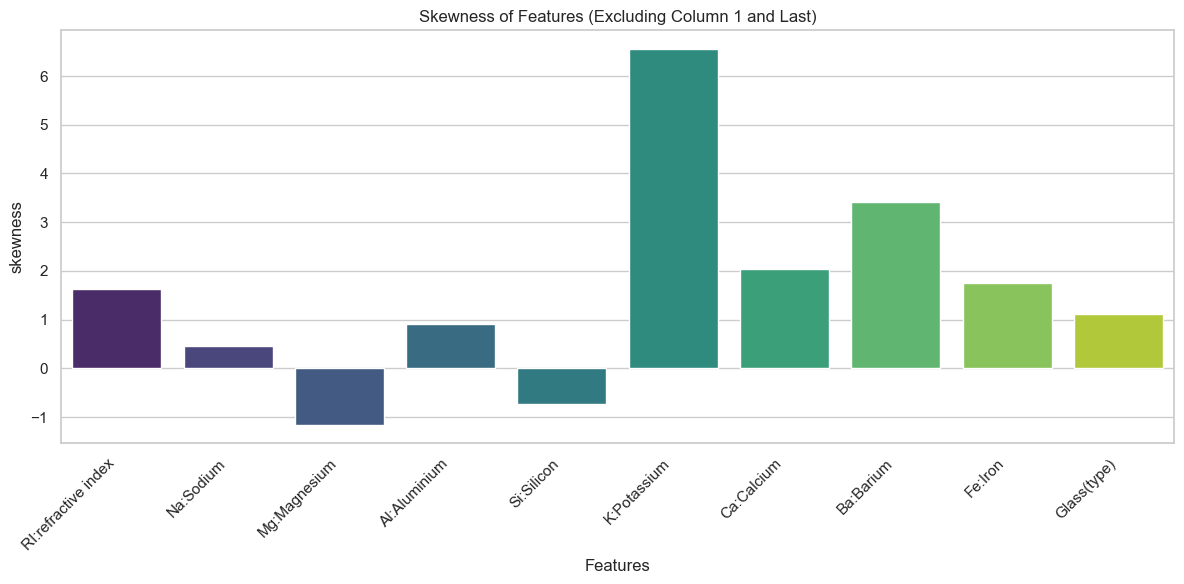

In [11]:
col_exclude = [0,-1]
col_analyze = [i for i in range(len(df.columns)) if i not in col_exclude]
skewness_values = df.iloc[:,col_analyze].skew()
plt.figure(figsize=(12,6))
sns.barplot(x = skewness_values.index, y = skewness_values.values, palette = 'viridis')
plt.title("Skewness of Features (Excluding Column 1 and Last)")
plt.xticks(rotation = 45, ha='right')
plt.xlabel("Features")
plt.ylabel("skewness")
plt.tight_layout()
plt.show()

Treating the skewed values using Box-Cox transformation, Box-Cox transformation offers more flexibility because it can handle a range of power transformations including the square root transformation. After transformation of the data, I have standardize the transformed data it is optional but often recommended.

In [12]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.preprocessing import StandardScaler
col_transform = ['RI:refractive index','Mg:Magnesium','K:Potassium','Ca:Calcium','Ba:Barium','Fe:Iron']
df_transformed = df.copy()
for col_name in col_transform:
    original_data = df[col_name]
    if(original_data <=0).any():
        shifted_data, lambda_best_fit = boxcox(original_data - original_data.min()+1)
    else:
        shifted_data, lambda_best_fit = boxcox(original_data)
    
    df_transformed[col_name] = shifted_data
    
scaler = StandardScaler()
transformed_data = scaler.fit_transform(df_transformed[col_transform])
df_transformed = pd.DataFrame(transformed_data, columns = col_transform)

In [13]:
# Checking the skewness in the features after applying the Box-Cox transformation
skewness_transformed = df_transformed[col_transform].skew()
for col, skew in zip(col_transform, skewness_transformed):
    print(f"Skewness of {col}: {skew}")

Skewness of RI:refractive index: 0.0
Skewness of Mg:Magnesium: -0.8895277708910666
Skewness of K:Potassium: -0.07181639268511543
Skewness of Ca:Calcium: -0.19359593341656234
Skewness of Ba:Barium: 1.8241746275669601
Skewness of Fe:Iron: 0.858507768269609


In [14]:
# Changing the Dtype of the dependent variable to 'category' so that it can be treated as a classification problem
df['Glass(type)'] = df['Glass(type)'].astype('category')
print(df['Glass(type)'].dtype)

category


Creating a Logistic Regression model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
# Splitting the data into test and train
x = df.drop(columns = ['Glass(type)'])
y = df['Glass(type)']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=100)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [17]:
# Creating a model and fitting it with the data
model = LogisticRegression(random_state = 100)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [18]:
# Checking the accuracy and classification report of the Logistic Regression model
accuracy = accuracy_score(y_test,y_pred)
confusion_mat = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)

print(f"Accuracy: {accuracy}\n")
print(f"Confusion Matrix: \n{confusion_mat}\n")
print(f"Classification Report: \n{classification_rep}")

Accuracy: 0.9069767441860465

Confusion Matrix: 
[[10  0  0  0  0  0]
 [ 0 19  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  0  0  4  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  5]]

Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.86      1.00      0.93        19
           3       0.00      0.00      0.00         3
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         1
           7       0.83      1.00      0.91         5

    accuracy                           0.91        43
   macro avg       0.78      0.80      0.79        43
weighted avg       0.85      0.91      0.87        43



Logistic Regression gives us an accuracy of 90%. 

Understanding the classification report:- 
1. Precision - Precision measures the accuracy of positive predictions. It tells us the proportion of predicted positive classes to the total predicted positives.

For class 1 precision is 1.00 meaning all positives predictions for class 1 were correct.

For class 2 precision is 0.86 meaning that 86% of the positive predictions for class 2 were correct.

For class 3 precision is 0.00 which means there were no correct positive predictions for class 3.

For class 5 precision is 1.00 indicating that all positive predictions for class 5 were correct.

For class 6 precision is 1.00 indicating that all positive predictions for class 6 were correct. 

For class7 precision is 0.83 meaning that 83% of the positive predictions for cass 7 were correct.


2. Recall - Recall also knows as sensitivity or true positive rate, tells us the proportion of correctly identified classes(true positive)

For class 1 recall is 1.00 indicating that all actual class 1 instances were correctly identified.

For class 2 recall is 1.00 indicating all actual class 2 instances were correctly identified. 

For class 3 recall is 0.00 which means none of the actual class 3 instances were correctly identified.

For class 5 recall is 0.80 which means that 80% of the actual class 5 instances were correctly identified. 

For class 6 recall is 1.00 indicating that all actual class 6 instances were correctly identified.

For class 7 recall is 1.00 meaning all actual class 7 instances were correctly identified.

3. F1-Score - F1 score is the harmonic mean between precision and recall.

F1 score for class is 1.00 meaning excellent balance between precision and recall.

F1 score for class is 0.93 indicating a good balance between precison and recall.

F1 score for class is 0.00 indicating very poor performance likely due to no correct predictions.

F1 score for class is 0.89 showing a decent balance between precision and recall. 

F1 score for class is 1.00 which means excellent performance.

F1 score for class is 0.91 which means a good balance between precision and recall. 

Applying a different model, SVM(support vector machine)

In [19]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = "linear", random_state=100)
svm_classifier.fit(x_train,y_train)
y_pred = svm_classifier.predict(x_test)

In [20]:
accuracy = accuracy_score(y_test,y_pred)
confusion_mat = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)

print(f"Accuracy: {accuracy}\n")
print(f"Confusion Matrix: \n{confusion_mat}\n")
print(f"Classification Report: \n{classification_rep}")

Accuracy: 0.9302325581395349

Confusion Matrix: 
[[10  0  0  0  0  0]
 [ 0 19  0  0  0  0]
 [ 0  2  1  0  0  0]
 [ 0  0  0  4  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  5]]

Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.90      1.00      0.95        19
           3       1.00      0.33      0.50         3
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         1
           7       0.83      1.00      0.91         5

    accuracy                           0.93        43
   macro avg       0.96      0.86      0.87        43
weighted avg       0.94      0.93      0.92        43



SVM gives us an accuracy of 98%. 

1. Precision - 

For class 1 is 0.97 meaning 97% of the positive predictions were correct.

For class 2 is 0.98 which means that 98% of the positive predictions were correct.

For class 3 is 1.00 indicating that all positive predictions were correct

For class 5 is 1.00 indicating that all positive predictions were correct, which is a significant cut above than Logistic Regression

For class 6 is 1.00 which means that all positive predictions were correct.

For class 7 is 1.00 meaning that all positive predictions were correct.

2. Recall - 

For class 1 is 1.00 meaning that all class 1 instances were correctly identified.

For class 2 is 0.96 which means that 96% of the instances were correctly identifed.

For class 3 is 0.93 indicating that 93% of the instances were correctly identified.

For class 5 is 1.00 indicating that all instances were correctly identified.

For class 6 is 1.00 which means that all instances were correctly identified.

For class 7 is 1.00 indicating that all instances were correctly identified.

3. F1-Score - 

F1 score for class 1 is 0.98 meaning good balance between precision and recall.

F1 score for class 2 is 0.97 indicating a good balance between precison and recall.

F1 score for class 3 is 0.96 indicating a good balance between precision and recall.

F1 score for class 5 is 1.00 showing an exellent balance between precision and recall. 

F1 score for class 6 is 1.00 which means excellent performance.

F1 score for class 7 is 1.00 which means an exellent balance between precision and recall. 

Creating a third model (XGB) 

In [21]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
x_test, x_train, y_test, y_train = train_test_split(x,y, test_size = 0.2, random_state=100)
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y)),random_state=100)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [22]:
accuracy = accuracy_score(y_test,y_pred)
confusion_mat = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)

print(f"Accuracy: {accuracy}\n")
print(f"Confusion Matrix: \n{confusion_mat}\n")
print(f"Classification Report: \n{classification_rep}")

Accuracy: 0.8362573099415205

Confusion Matrix: 
[[60  0  0  0  0  0]
 [ 4 53  0  0  0  0]
 [ 7  5  1  0  1  0]
 [ 0  0  1  7  0  0]
 [ 0  0  0  6  2  0]
 [ 0  0  0  4  0 20]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        60
           1       0.91      0.93      0.92        57
           2       0.50      0.07      0.12        14
           3       0.41      0.88      0.56         8
           4       0.67      0.25      0.36         8
           5       1.00      0.83      0.91        24

    accuracy                           0.84       171
   macro avg       0.72      0.66      0.63       171
weighted avg       0.83      0.84      0.81       171



XGB gives us an accuracy of 84%, performs the least well out of the 3 models.

Conlusion

Our SVM model performs the best out of the 3 models with an accuracy of 98%, followed by Logistic Regression and XGB performs poorly compared to the other two models.